In [83]:
# import required libraries and packages
from qiskit import *
from qiskit.visualization import *
from qiskit.tools.jupyter import *
from math import *
from numpy import *
import random

# print version table
%qiskit_version_table

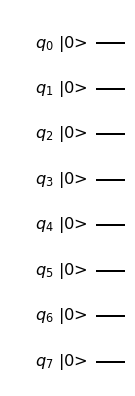

In [84]:
# make the circuit diagrams look nice by using inline matplotlib formatting
%matplotlib inline  

# create a quantum circuit with 8 qubits (each is prepared in the |0 > state by default)
qc = QuantumCircuit(8);

# note that to specify the number of classical bits you can add it as an argument
# so "qc = QuantumCircuit(3,1);" means 3 qubits and 1 classical bit 

# draw with the inline matplotlib formatting and also show the initial state of each qubit
qc.draw('mpl', initial_state=True)     

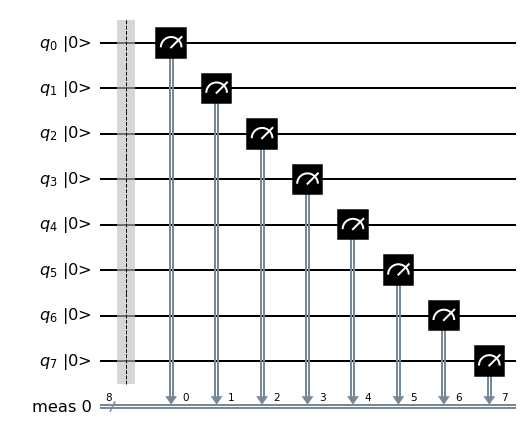

In [70]:
# measure every qubit and assign the measurement result to a newly assigned classical bit (irrespective of the number of classical bits specified previously)
qc.measure_all()

# draw with the inline matplotlib formatting and also show the initial state of each qubit
qc.draw('mpl', initial_state=True)         

In [71]:
# now we want to simulate this circuit and see what we get we run it
# we expect to get 00000000 because we did not really do anything to the input state
# this shows all the simulators available (each has a specific purpose but we usually use the first)
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [72]:
# so we get access to the simulator
sim = Aer.get_backend('aer_simulator') 

In [73]:
# this command optimizes the circuit to run efficiently on the simulator you choose
# often this means using an equivalent set of gate operations to create an equivalent circuit
# you do not have to use this command, but it probably speeds things up so just do it
qc = transpile(qc, sim)

In [74]:
# run the circuit on the simulator
result = sim.run(qc).result()

In [75]:
# get simulation results
counts = result.get_counts()

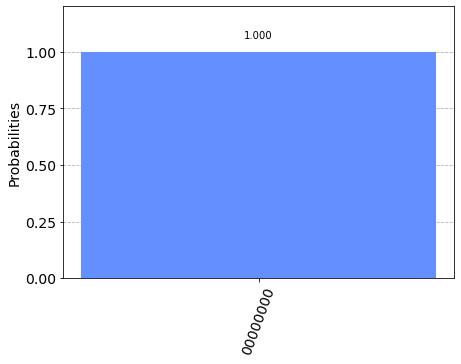

In [76]:
# plot results
plot_histogram(counts)

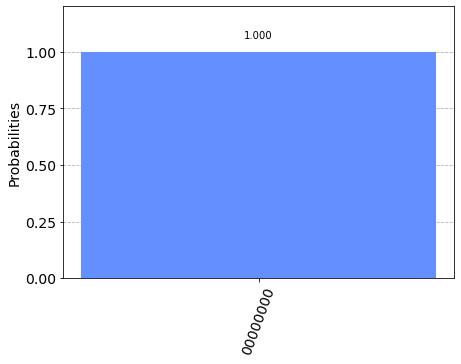

In [77]:
# the code we just wrote above simulates some default number of shots/repeats and plots a histogram of the results
# but we can change the number of shots and store individual measurement results
# do a 5 shot measurement
result = sim.run(qc, shots=5, memory = True).result()
counts = result.get_counts()
plot_histogram(counts)

In [78]:
# see data for individual shots
memory = result.get_memory(qc)
print(memory)

['00000000', '00000000', '00000000', '00000000', '00000000']


In [80]:
# so what we have done is to run our circuit on a simulator which mimics a quantum computer
# but it is a classical computer so be aware of this
# to run the circuit on an actual hardward quantum device we need to use the backend object of the device
# so basically we need to change "sim = Aer.get_backend('aer_simulator')" to get the backend object of the actual hardware device
# we will deal with this later 

In [124]:
# now we can implement a more complicated circuit which actually does something
# we will do the half adder or binary adder


# define function to do everything given the input values


# a not gate is just a NOT gate same as what we expect classically
# a cnot gate is a XOR gate with the inputs being the control and target qubits, and the output being the final state of the target qubit
# a toffoli gate is an AND gate with the inputs being the two control qubits and one target qubit, and the output being the bit flip action on the target qubit

def adder(input1, input2):
    
    # create a quantum circuit with 4 qubits (q0, q1, q2, q3) and 2 classical bits (c0, c1)
    quantc = QuantumCircuit(4,2);

    # apply a not gate on the first two qubits (q0 and q1)
    
    if input1 == 1:
        quantc.x(0);
        
    if input2 == 1:
        quantc.x(1);

    # create a barrier to ensure the transpile step can only modify regions within 2 barriers
    quantc.barrier()

    # apply a cnot gate on the third qubit controlled by the first (q0 ---> q2)
    quantc.cx(0,2);
    # apply a cnot gate on the third qubit controlled by the second (q1 ---> q2)
    quantc.cx(1,2);

    # apply a toffoli (or ccnot) gate on the fourth qubit controlled by the first and second (q0 --- > q3 < --- q1)
    quantc.ccx(0,1,3);

    # measure third qubit and assign to first cbit (q2 -> c0)
    quantc.measure(2,0)

    # measure fourth qubit and assign to second cbit (q4 -> c1)
    quantc.measure(3,1)

    # create a barrier to ensure the transpile step can only modify regions within 2 barriers
    quantc.barrier()

    # draw
    quantc.draw('mpl')
    
    # simulate and plot
    sim = Aer.get_backend('aer_simulator') 
    quantc = transpile(quantc, sim)
    result = sim.run(quantc).result()
    counts = result.get_counts()
    return plot_histogram(counts)


    
    

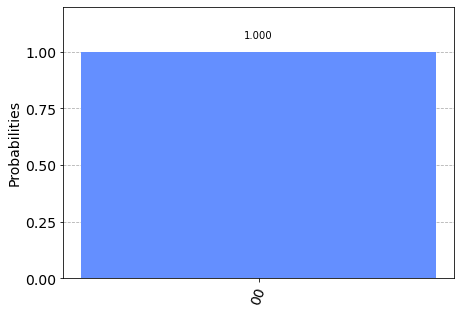

In [125]:
# 0+0 = 00
adder(0,0)

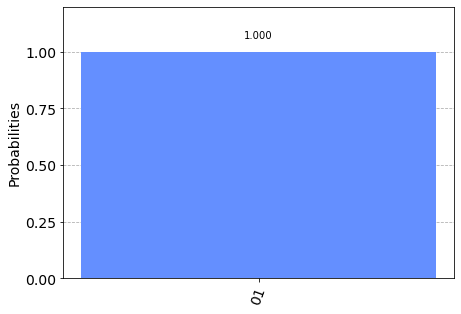

In [126]:
# 0+1 = 01
adder(0,1)

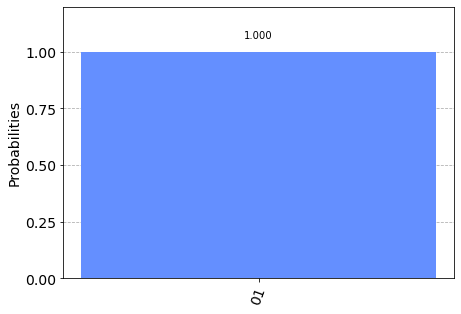

In [127]:
# 1+0 = 01
adder(1,0)

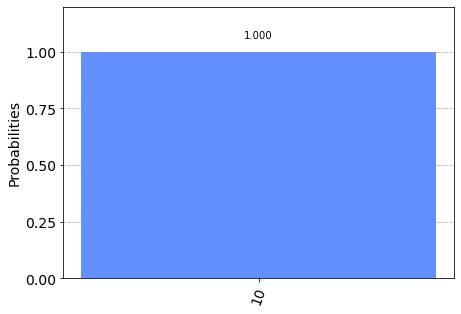

In [128]:
# 1+1 = 10
adder(1,1)

In [111]:
# everything works as expected and the adder does its job (you can think more about how and why it works on pen and paper, but the point is coding so don't worry too much about it)

In [ ]:
# one thing to keep in mind is that, if you think of the qubits in their initial state encoding a binary string, you need to read it correctly
# so 16 is 10000 if we convert from decimal to binary
# to encode this as the initial state you need to do " q = QuantumCircuit(5); q.x(5); "
# so reading the binary string like -->-->--> is the same are reading the state from the bottom and towards the top
# this is just a convention but an important one so keep it in mind


In [ ]:
# one last thing to look at is the "assemble" command
# don't know exactly what it is
# but it does many things at once
# so let "q" be your quantum circuit and "sim" be a backend simulator 
# then "qobj = assemble(q); result = sim.run(qobj).result(); counts = result.get_counts(); plot_histogram(counts);"
# run the circuit, get the results, and plot them
# so it is very similar to the process we followed before, and maybe the only difference is we had transpile before but not anymore
# maybe the transpile step is part of assemble
# anyway I am not sure, but just know this is an alternative way to do things
